<font color="#CC3D3D"><p>
# Evaluation Metrics

<font color = "#CC3D3D"><p>
- [Module Import](#Module-Import)
- [Classifier Model Evaluation Metrics](#Classifier-Model-Evaluation-Metrics)
    - [Accuracy](#Accuracy)
    - [Recall, Precision & F1](#Recall,-Precision-&-F1)
    - [ROC-AUC](#ROC-AUC)
- [Regressor Model Evaluation Metrics](#Regressor-Model-Evaluation-Metrics)
    - [MSE , RMSE, RMSLE](#MSE-,-RMSE,-RMSLE)
    - [RMSE와 RMSLE](#RMSE와-RMSLE)

# Module Import

In [28]:
# Data Wrangling 
import pandas as pd
import numpy as np 

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split

#Model import 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve  # sklearn 0.22
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


#EDA
import matplotlib.pyplot as plt
%matplotlib inline

# Classifier Model Evaluation Metrics

## Imbalance Data 
- 효율적인 평가지표 비교를 위해 숫자 9를 positive class로 설정하여 불균형 데이터를 생성한다. 

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

In [2]:
# y가 true(숫자 9)인 비율 
(y == True).mean()

0.1001669449081803

*Data Split*

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=777)

## Train Models

***Decision Tree***

In [7]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

***Logistic Regrssion***

In [8]:
logit = LogisticRegression(C=0.0001).fit(X_train, y_train)
pred_logit = logit.predict(X_test)

## Accuracy

In [9]:
print("tree:", accuracy_score(y_test, pred_tree))
print("logit:", accuracy_score(y_test, pred_logit))

tree: 0.9422222222222222
logit: 0.9177777777777778


<font color='green'><p>
###  Confusion Matrix ###
<br>
<img align="left" src="http://drive.google.com/uc?export=view&id=1wIJIJENLCnfoesuTUMDjywPLMJnat36E" width=700 height=500>

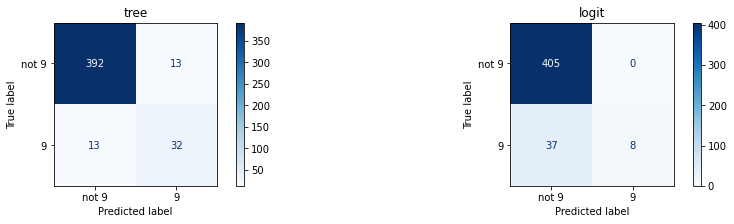

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,3))
plot_confusion_matrix(tree, X_test, y_test, display_labels=["not 9", "9"], cmap=plt.cm.Blues, ax=ax[0])
plot_confusion_matrix(logit, X_test, y_test, display_labels=["not 9", "9"], cmap=plt.cm.Blues, ax=ax[1])
ax[0].set_title('tree')
ax[1].set_title('logit')
plt.show()

## Recall, Precision & F1

In [20]:
print("Recall score")
print("tree:",round(recall_score(y_test, pred_tree),2))
print("logit:",round(recall_score(y_test, pred_logit),2))
print("-------------------------------------------")
print("Precision score")
print("tree:",round(precision_score(y_test, pred_tree),2))
print("logit:",round(precision_score(y_test, pred_logit),2))
print("--------------------------------------------")
print("F1 score")
print("tree:",round(f1_score(y_test, pred_tree),2))
print("logit:",round(f1_score(y_test, pred_logit),2))

Recall score
tree: 0.71
logit: 0.18
-------------------------------------------
Precision score
tree: 0.71
logit: 1.0
--------------------------------------------
F1 score
tree: 0.71
logit: 0.3


## ROC-AUC
<img align="left" src="http://drive.google.com/uc?export=view&id=1Htx445FclSqHhhNxPT_uOYQOBiuneWXJ" width=600 height=400>

***AUC***

In [24]:
fpr, tpr, _ = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
print('tree: ', auc(fpr, tpr))

fpr, tpr, _ = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
print('logit: ', auc(fpr, tpr))

tree:  0.9071604938271605
logit:  0.9754183813443073


***ROC curve***

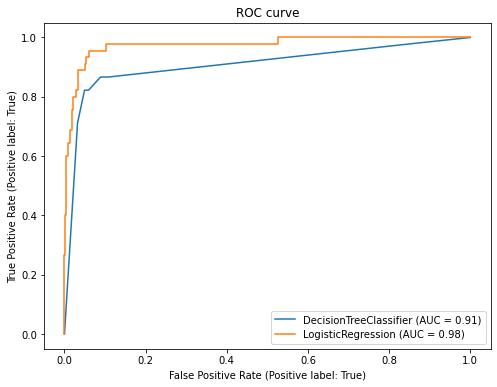

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plot_roc_curve(tree, X_test, y_test, ax=ax)
plot_roc_curve(logit, X_test, y_test, ax=ax)
ax.set_title('ROC curve')
plt.show()

# Regressor Model Evaluation Metrics

### MSE , RMSE, RMSLE

In [74]:
prediction = [1]
y_target = [0.5]

In [75]:
MSE = mean_squared_error(prediction, y_target)
RMSE = np.sqrt(MSE)
# mean_saured_error(prediction, y_traget, squared=False)

MSLE = mean_squared_log_error(prediction,y_target)
RMSLE = np.sqrt(MSLE)

print("정답 : 0.5, 예측값 : 1 ")
print('MSE',MSE)
print('RMSE',RMSE)
print('RMSLE',RMSLE)

정답 : 0.5, 예측값 : 1 
MSE 0.25
RMSE 0.5
RMSLE 0.2876820724517809


### RMSE와 RMSLE

**1. RMSLE는 outlier에 강하다** 

In [76]:
prediction = [67,78,91]
y_target = [60,80,90]

MSE = mean_squared_error(prediction, y_target)
RMSE = np.sqrt(MSE)

MSLE = mean_squared_log_error(prediction,y_target)
RMSLE = np.sqrt(MSLE)

print("outlier가 없는 데이터의 경우 ")
print("-----------------------------")
print("RMSE : ", RMSE)
print("RMSLE : ", RMSLE)

outlier가 없는 데이터의 경우 
-----------------------------
RMSE :  4.242640687119285
RMSLE :  0.0646679237996832


In [77]:
prediction = [67,78,91,102]
y_target = [60,80,90,750]

MSE = mean_squared_error(prediction, y_target)
RMSE = np.sqrt(MSE)

MSLE = mean_squared_log_error(prediction,y_target)
RMSLE = np.sqrt(MSLE)

print("outlier가 있는 데이터의 경우 ")
print("-----------------------------")
print("RMSE : ", RMSE)
print("RMSLE : ", RMSLE)

outlier가 있는 데이터의 경우 
-----------------------------
RMSE :  324.02083266358045
RMSLE :  0.9949158238939428


**2. RMSLE 는 상대적인 ERROR를 측정해준다.** 

In [78]:
prediction_1 = [100]
y_target_1 = [90]

prediction_2 = [10000]
y_target_2 = [9000]

MSE_p1 = mean_squared_error(prediction_1, y_target_1)
RMSE_p1 = np.sqrt(MSE_p1)
MSE_p2 = mean_squared_error(prediction_2, y_target_2)
RMSE_p2 = np.sqrt(MSE_p2)


MSLE_p1 = mean_squared_log_error(prediction_1,y_target_1)
RMSLE_p1 = np.sqrt(MSLE_p1)
MSLE_p2 = mean_squared_log_error(prediction_2,y_target_2)
RMSLE_p2 = np.sqrt(MSLE_p2)





print("상대적인 크기가 동일한 경우 ")
print("------------------------------------------------")
print("RMSE :  ", RMSE_p1, "               , ",RMSE_p2)
print("RMSLE : ", RMSLE_p1,", ",RMSLE_p2)

상대적인 크기가 동일한 경우 
------------------------------------------------
RMSE :   10.0                ,  1000.0
RMSLE :  0.10426101032440993 ,  0.10534940571943174


**3. RMSLE는 예측값이 실제값보다 작을 때 패널티를 부여한다.** 

In [82]:
prediction_1 = [1400]
prediction_2 = [600]
y_target= [1000]


MSE_p1 = mean_squared_error(prediction_1, y_target)
RMSE_p1 = np.sqrt(MSE_p1)
MSE_p2 = mean_squared_error(prediction_2, y_target)
RMSE_p2 = np.sqrt(MSE_p2)


MSLE_p1 = mean_squared_log_error(prediction_1,y_target)
RMSLE_p1 = np.sqrt(MSLE_p1)
MSLE_p2 = mean_squared_log_error(prediction_2,y_target)
RMSLE_p2 = np.sqrt(MSLE_p2)





print("예측값이 실제값보다 큰 경우 ")
print("------------------------------------------------")
print("RMSE :  ", RMSE_p1)
print("RMSLE : ", RMSLE_p1)
print()
print("예측값이 실제값보다 작은 경우 ")
print("------------------------------------------------")
print("RMSE :  ", RMSE_p2)
print("RMSLE : ", RMSLE_p2)

예측값이 실제값보다 큰 경우 
------------------------------------------------
RMSE :   400.0
RMSLE :  0.3361867670217862

예측값이 실제값보다 작은 경우 
------------------------------------------------
RMSE :   400.0
RMSLE :  0.5101598447800129
